In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pylab
#import veikoscripts as vs
from ggplot import *
from decimal import *
from altair import *
from datetime import datetime, timedelta

In [3]:
#pd.set_option('display.float_format', '{:.2E}'.format)
natokas = pd.read_csv('NATO_Test_tulemused.csv', header=0, sep=',', na_values='#VALUE!', na_filter=True)

In [4]:
##Funktsioon leitud siit (http://andrewgaidus.com/Analyzing_Race_Results_Part_1_Web_Scraping/), et muuta jooksuajad
##pandasele söödavaks
def convert_date_string_to_datetime(time_string):
    t=datetime.strptime(time_string, "%H:%M:%S")
    delta = timedelta(minutes=t.minute, seconds=t.second)
    return delta

##Muutab tund:minutid:sekundid minutiteks. Parem joonisele kanda
natokas['jooksuaeg'] = natokas['Jooks'].apply(convert_date_string_to_datetime)
natokas['Minutes'] = natokas['jooksuaeg'].dt.seconds/60

# Kätekõverdused

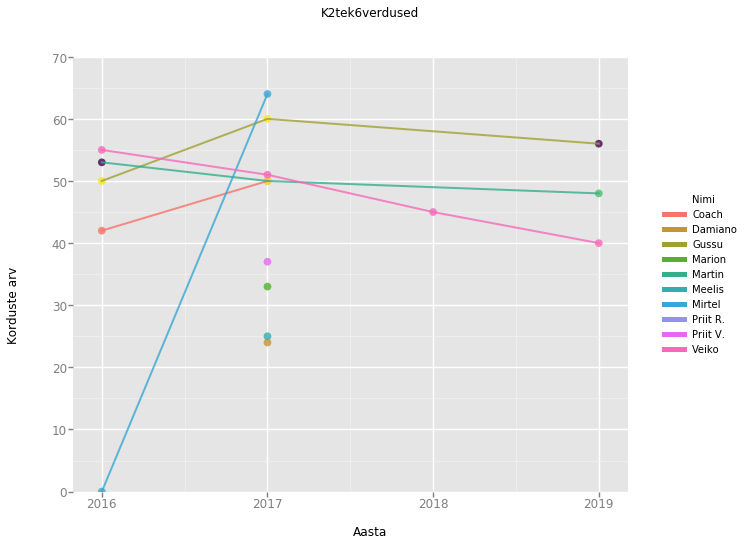

<ggplot: (8778956595509)>


In [6]:
katekad = ggplot(natokas, aes('Aasta',  'K2tek6verdused', color='Nimi')) + geom_point(size=60, alpha=0.8) +\
    geom_line(size=2, alpha=0.8) +\
    ylim(0,70) + ggtitle('K2tek6verdused') + ylab('Korduste arv') +\
    scale_x_continuous(breaks=[2016 ,2017, 2018, 2019],labels=["2016", "2017", "2018", "2019"])
print katekad

# Kõhulihased

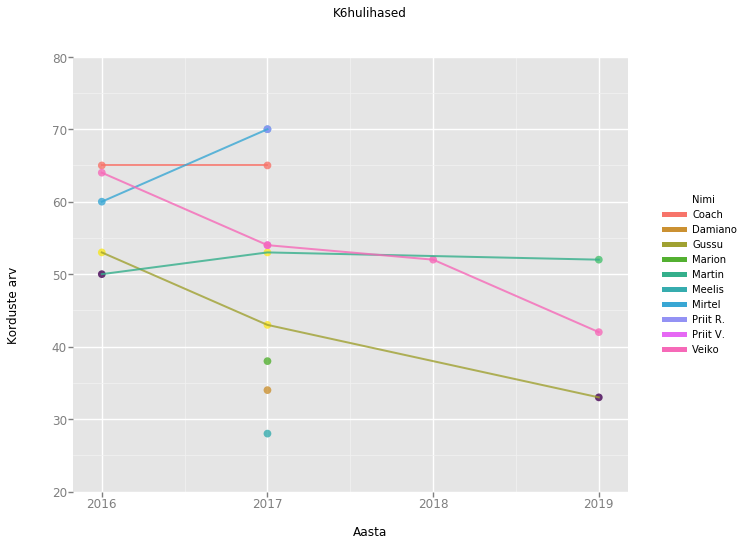

<ggplot: (8778952889333)>


In [7]:
kohukad = ggplot(natokas, aes('Aasta',  'K6hulihased', color='Nimi')) + geom_point(size=60, alpha=0.8) +\
    geom_line(size=2, alpha=0.8) +\
    ylim(20,80) + ggtitle('K6hulihased') + ylab('Korduste arv') +\
    scale_x_continuous(breaks=[2016 ,2017, 2018, 2019],labels=["2016", "2017", "2018", "2019"])
print kohukad

# 3,2 km jooks

In [ ]:
jooks = ggplot(natokas, aes('Aasta',  'Minutes', color='Nimi')) + geom_point(size=60, alpha=0.8) +\
    geom_line(size=2, alpha=0.8) +\
    ylim(25,0) + ggtitle('3,2 km jooks') + ylab('Aeg minutites') +\
    scale_y_continuous( limits=(10,25)) + scale_x_continuous(breaks=[2016 ,2017, 2018, 2019],labels=["2016", "2017", "2018", "2019"])
print jooks

# Kogu puntkisumma

/home/veiko/anaconda2/lib/python2.7/site-packages/ggplot/ggplot.py:602: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  fill_levels = self.data[[fillcol_raw, fillcol]].sort(fillcol_raw)[fillcol].unique()


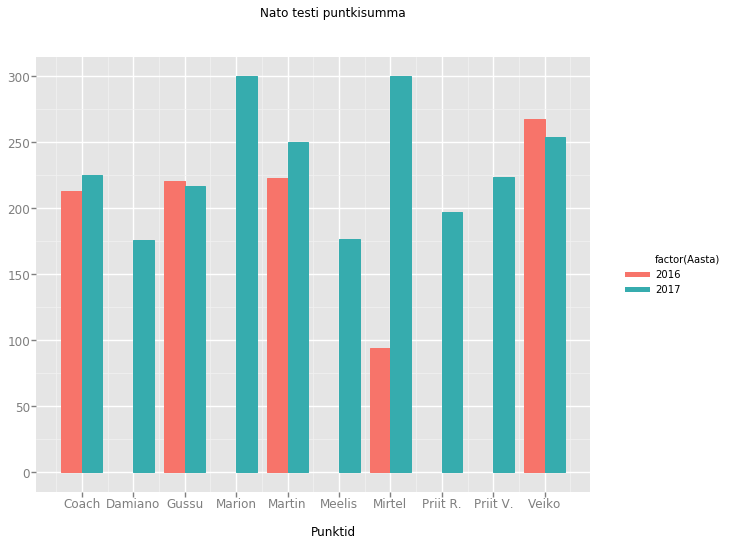

<ggplot: (8772446979017)>


In [22]:
summa = ggplot(natokas, aes(x='Nimi', fill='factor(Aasta)', weight='Punktide_summa')) + geom_bar() +\
    ggtitle('Nato testi puntkisumma') + xlab('Punktid')
print summa